#Decision Tree

In [17]:
#Importing important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, log_loss, mean_squared_error
import math
from sklearn.preprocessing import LabelEncoder
!pip install scikit-plot
import scikitplot as skplt
import scikitplot as skplt
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv('Project.csv')
df.head()

,c/c++,java,python,wt,dbms,se,ds,algo,math,stats,project
0,4,4,4,3,4,4,4,4,4,4,AI
1,4,3,4,3,5,5,4,3,3,4,AI
2,3,3,3,3,3,5,5,5,2,4,WA
3,4,3,5,3,4,5,3,3,4,4,Cloud
4,5,2,5,3,4,5,5,5,3,3,Others


In [19]:
X = df.drop(columns=(['project']))
y = df['project']  
le = LabelEncoder()
y = le.fit_transform(y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)
print("Obtained accuracy of KNN Algorithm : ",accuracy_score(dt.predict(X_test),y_test)*100,"%")
y_pred = dt.predict(X_test)
print("R2 Value                           :",round(r2_score(y_test,y_pred),2))
print("Log loss                           : ",round(log_loss(y_test, dt.predict_proba(X_test)),2))
print("Mean Squared Error                 : ",round(mean_squared_error(y_test,y_pred),2))

Obtained accuracy of KNN Algorithm :  37.5 %
R2 Value                           : -0.79
Log loss                           :  1.97
Mean Squared Error                 :  11.48


In [27]:
from sklearn.tree import plot_tree
from matplotlib.pylab import rcParams

[Text(0.5, 0.875, 'X[3] <= 2.5\ngini = 0.786\nsamples = 320\nvalue = [67, 31, 16, 10, 46, 38, 112]'),
 Text(0.25, 0.625, 'X[2] <= 2.5\ngini = 0.798\nsamples = 97\nvalue = [29, 7, 7, 1, 21, 18, 14]'),
 Text(0.125, 0.375, 'X[7] <= 3.5\ngini = 0.804\nsamples = 53\nvalue = [8, 3, 4, 1, 14, 12, 11]'),
 Text(0.0625, 0.125, 'gini = 0.81\nsamples = 50\nvalue = [8, 3, 4, 1, 11, 12, 11]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 0, 3, 0, 0]'),
 Text(0.375, 0.375, 'X[9] <= 4.5\ngini = 0.711\nsamples = 44\nvalue = [21, 4, 3, 0, 7, 6, 3]'),
 Text(0.3125, 0.125, 'gini = 0.678\nsamples = 40\nvalue = [21, 4, 3, 0, 5, 4, 3]'),
 Text(0.4375, 0.125, 'gini = 0.5\nsamples = 4\nvalue = [0, 0, 0, 0, 2, 2, 0]'),
 Text(0.75, 0.625, 'X[5] <= 3.5\ngini = 0.742\nsamples = 223\nvalue = [38, 24, 9, 9, 25, 20, 98]'),
 Text(0.625, 0.375, 'X[0] <= 1.5\ngini = 0.647\nsamples = 120\nvalue = [17, 9, 6, 4, 12, 5, 67]'),
 Text(0.5625, 0.125, 'gini = 0.56\nsamples = 5\nvalue = [1, 0, 1, 0, 3, 0, 0]'

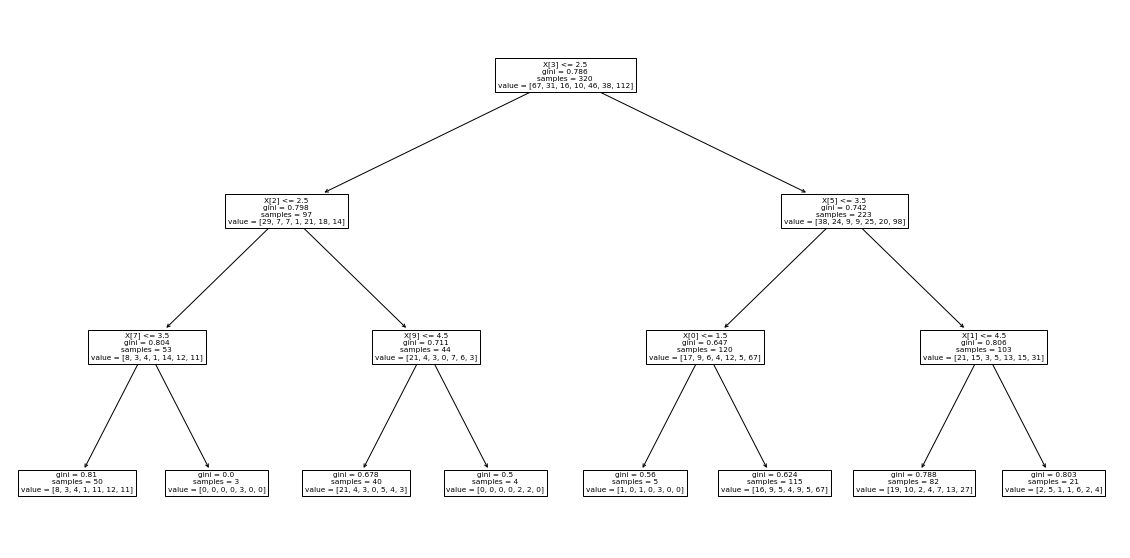

In [30]:
rcParams['figure.figsize'] = 20,10

plot_tree(dt)

In [20]:
# Confusion Matrix

cm = confusion_matrix(y_test,y_pred)
cm

array([[ 2,  0,  0,  0,  0,  2, 18],
       [ 1,  0,  0,  0,  0,  1,  1],
       [ 2,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  2,  3,  3],
       [ 4,  0,  0,  0,  1,  2,  5],
       [ 0,  0,  0,  0,  3,  3, 24]])

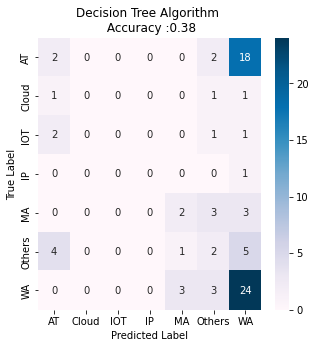

In [21]:
#Heatmap

cm = confusion_matrix(y_test,y_pred)
cm_df = pd.DataFrame(cm, index = ['AT','Cloud','IOT','IP','MA','Others','WA'],
                         columns = ['AT','Cloud','IOT','IP','MA','Others','WA'])
plt.figure(figsize=(5,5))
sns.heatmap(cm_df,annot=True, cmap='PuBu')
plt.title('Decision Tree Algorithm \n Accuracy :{0:.2f}'.format(accuracy_score(y_test,y_pred)))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [22]:
# Classification Report
print("Classification Report \n",classification_report(y_test, y_pred,target_names = ['AT','Cloud','IOT','IP','MA','Others','WA']))

Classification Report 
               precision    recall  f1-score   support

          AT       0.22      0.09      0.13        22
       Cloud       0.00      0.00      0.00         3
         IOT       0.00      0.00      0.00         4
          IP       0.00      0.00      0.00         1
          MA       0.33      0.25      0.29         8
      Others       0.17      0.17      0.17        12
          WA       0.45      0.80      0.58        30

    accuracy                           0.38        80
   macro avg       0.17      0.19      0.17        80
weighted avg       0.29      0.38      0.31        80



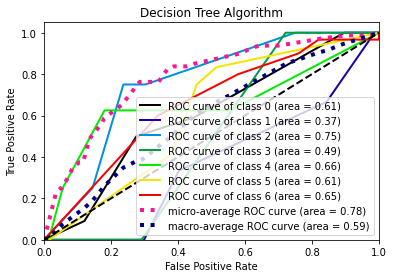

In [23]:
#ROC Curve

skplt.metrics.plot_roc_curve(y_test, dt.predict_proba(X_test))
plt.title("Decision Tree Algorithm")
plt.show()

In [24]:
#Prediction

input1 = [3,4,5,2,4,5,3,4,5,3]
input2 = [5,5,5,1,4,5,3,5,5,3]
input3 = [4,4,2,1,4,2,2,1,1,1]
input4 = [4,4,2,1,4,2,2,1,1,1]
input5 = [1,4,2,1,1,2,2,1,1,1]
input6 = [5,5,5,3,2,2,2,5,2,5]
input7 = [5,5,2,1,2,2,2,1,1,1]
inputs = [input1,input2,input3,input4,input5,input6,input7]
for input in inputs:
    print("Input  : ",input)
    input = np.reshape(input,(1,10))
    cls = dt.predict(input)  
    if cls == 0:
        print("Output :  AI")
    elif cls == 1:
        print("Output :  Cloud")
    elif cls == 2:
        print("Output :  IOT")
    elif cls == 3:
        print("Output :  IP")
    elif cls == 4:
        print("Output :  MA")
    elif cls==5:
        print("Output :  Others")
    else:
        print("Output :  WA")

Input  :  [3, 4, 5, 2, 4, 5, 3, 4, 5, 3]
Output :  AI
Input  :  [5, 5, 5, 1, 4, 5, 3, 5, 5, 3]
Output :  AI
Input  :  [4, 4, 2, 1, 4, 2, 2, 1, 1, 1]
Output :  Others
Input  :  [4, 4, 2, 1, 4, 2, 2, 1, 1, 1]
Output :  Others
Input  :  [1, 4, 2, 1, 1, 2, 2, 1, 1, 1]
Output :  Others
Input  :  [5, 5, 5, 3, 2, 2, 2, 5, 2, 5]
Output :  WA
Input  :  [5, 5, 2, 1, 2, 2, 2, 1, 1, 1]
Output :  Others


In [25]:
def predict(a):
    print("Ratings : ",a)
    a = np.reshape(a,(1,10))
    cls = dt.predict(a) 
    cls = np.argmax(cls, axis=-1).astype('int') 
    if cls == 0:
        return "AI"
    elif cls == 1:
        return "Cloud"
    elif cls == 2:
        return "IOT"
    elif cls == 3:
        return "IP"
    elif cls == 4:
        return "MA"
    elif cls==5:
        return "Others"
    else:
        return "WA"

In [26]:
input = [5,4,3,2,4,3,2,5,4,3]
predict(input)

Ratings :  [5, 4, 3, 2, 4, 3, 2, 5, 4, 3]


'AI'